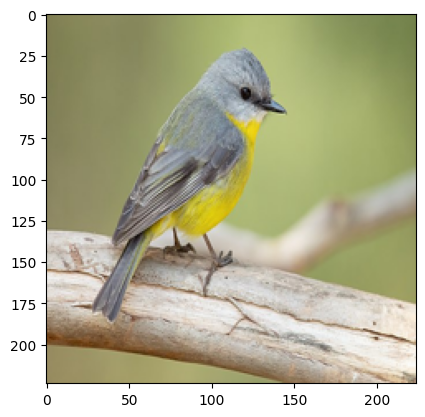

In [1]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Eopsaltria_australis_-_Mogo_Campground.jpg/640px-Eopsaltria_australis_-_Mogo_Campground.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((224, 224))
plt.imshow(img)
plt.show()

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

#img_path = 'elephant.jpg'
#img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
res = decode_predictions(preds, top=3)[0]
item = res[0][1]
prob = res[0][2]
print(item, prob)
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 1s 583ms/step
indigo_bunting 0.1954581


In [5]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import requests
from io import BytesIO

# Define the URL of the image you want to use
url = 'https://example.com/image.jpg'

# Download the image and read it into a PIL image object
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Resize the image to the required input size of ResNet50
img = img.resize((224, 224))

# Convert the PIL image to a numpy array
x = image.img_to_array(img)

# Expand the dimensions of the array to make it compatible with ResNet50 input shape
x = np.expand_dims(x, axis=0)

# Preprocess the image by subtracting the mean pixel value of the ImageNet dataset
x = preprocess_input(x)

# Load the ResNet50 model
from keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')

# Predict the class probabilities of the image
preds = model.predict(x)

# Decode the predictions and print the top 5 classes
decoded_preds = decode_predictions(preds, top=5)[0]
for i in range(len(decoded_preds)):
    print('{}: {:.2f}%'.format(decoded_preds[i][1], decoded_preds[i][2]*100))


ModuleNotFoundError: No module named 'keras.applications.resnet50'